# Boston Crime Analysis

## By: Trey Williams

**Background:**

Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.

Find more information: https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system 
<br>The website also includes a data dictionary!<br>

-------
**Additional Information**

The Analyze Boston Data Exports posted now are the updated incident data from the Mark43 RMS Database which launched in September of 2019 and is complete through present with the exclusion of data that falls under MGL ch.41 s.98f. The 2019 data that was originally posted contained combined exports from the Intergraph RMS and the Mark43 RMS during 2019 but the Extract/Transfer/Load process was not updated during the transition. We are continuing work on producing the gap data from January 2019 to September 2019 from our legacy Intregraph RMS and will be publishing this as soon as the work is complete.


## Project Charter

### Introduction

As a lifelong resident of Boston, I am curious about the crimes committed within the city. Thankfully, the data provided by the city can give me a glimpse of Boston's underbelly. I hope to understand better what crimes are being reported more often than others and where the town is happening.   I have collected several datasets from https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system. Although, the available data starts in 2015, I will be using data from 2017 - 2021 with a total sample size of n=314597; both 2019 (n=19782 | Sep - Dec) and 2021 (n=23695 | Jan - May) are partial years.  

Sample Space:
* 2017, n=101338
* 2018, n=98888
* 2020, n=70894

**Business Requirements/Understanding:**

1. What are top offenses committed in the city?
2. Are certain crimes committed during a specific time-period?
3. Does geography play a role in particular crimes being commited?
4. Has crime decreased or increased over time?
    * What types of offesens remain relevant (stats-quo)
    * Newer crimes being committed 
    * Has a specific occurence of a particular offense decreased over time?
5. Can we determine high risk areas based on a set of features?

**Overview:**

I plan to utilize the [CRISP-DM](https://www.datascience-pm.com/crisp-dm-2/) process model for this project:
1.    Business understanding – What does the business need?
2.    Data understanding – What data do we have / need? Is it clean?
3.    Data preparation – How do we organize the data for modeling?
4.    Modeling – What modeling techniques should we apply?
5.    Evaluation – Which model best meets the business objectives?
6.    Deployment – How do stakeholders access the results?

![crisp-dm](https://www.kdnuggets.com/wp-content/uploads/crisp-dm-4-problems-fig1.png)


# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Gather Data

In [2]:
df = pd.read_excel('crime_analysis_data.xlsx')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I192074488,619,Larceny,LARCENY ALL OTHERS,C11,351,NaN,2017-08-23 00:00:00,2017,8,Wednesday,0,Part One,ADAMS ST,42.300605,-71.059230,"(42.30060526, -71.05923027)"
1,I192073511,1107,Fraud,FRAUD - IMPERSONATION,B3,435,NaN,2017-02-21 00:01:00,2017,2,Tuesday,0,Part Two,ARMANDINE ST,42.284315,-71.074108,"(42.28431486, -71.07410838)"
2,I192073187,2629,Harassment,HARASSMENT,C6,231,NaN,2017-07-13 00:00:00,2017,7,Thursday,0,Part Two,E FIFTH ST,42.333989,-71.032606,"(42.33398889, -71.03260574)"
3,I192072907,802,Simple Assault,ASSAULT SIMPLE - BATTERY,D4,171,NaN,2017-09-01 16:32:00,2017,9,Friday,16,Part Two,HARRISON AVE,42.335119,-71.074917,"(42.33511904, -71.07491710)"
4,I192072900,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,D4,151,NaN,2017-09-01 00:00:00,2017,9,Friday,0,Part Two,WARREN AVE,42.345163,-71.071291,"(42.34516350, -71.07129114)"


## Explanatory Data Analysis

In [3]:
# Get the dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314597 entries, 0 to 314596
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      314597 non-null  object        
 1   OFFENSE_CODE         314597 non-null  int64         
 2   OFFENSE_CODE_GROUP   200226 non-null  object        
 3   OFFENSE_DESCRIPTION  314597 non-null  object        
 4   DISTRICT             312962 non-null  object        
 5   REPORTING_AREA       314597 non-null  object        
 6   SHOOTING             115230 non-null  object        
 7   OCCURRED_ON_DATE     314597 non-null  datetime64[ns]
 8   YEAR                 314597 non-null  int64         
 9   MONTH                314597 non-null  int64         
 10  DAY_OF_WEEK          314597 non-null  object        
 11  HOUR                 314597 non-null  int64         
 12  UCR_PART             200167 non-null  object        
 13  STREET        

In [4]:
# descriptive statistics
df.describe(include = 'all')

<ipython-input-4-5332fcbdcb2d>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,314597,314597.000000,200226,314597,312962,314597,115230.0,314597,314597.000000,314597.000000,314597,314597.000000,200167,310275,301139.000000,3.011390e+05,314597
unique,290591,NaN,66,244,13,880,3.0,237821,NaN,NaN,7,NaN,4,11750,NaN,NaN,30738
top,I172053750,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0.0,2017-06-01 00:00:00,NaN,NaN,Friday,NaN,Part Three,WASHINGTON ST,NaN,NaN,"(0.00000000, 0.00000000)"
freq,18,NaN,23701,20673,48189,27574,112733.0,33,NaN,NaN,47880,NaN,103882,14387,NaN,NaN,13458
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17 03:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2348.562393,NaN,NaN,NaN,NaN,NaN,NaN,2018.417413,6.557542,NaN,13.001205,NaN,NaN,41.842099,-7.028218e+01,NaN
std,NaN,1197.161427,NaN,NaN,NaN,NaN,NaN,NaN,1.337922,3.503582,NaN,6.323226,NaN,NaN,4.490279,7.495530e+00,NaN
min,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-7.117867e+01,NaN
25%,NaN,1102.000000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,3.000000,NaN,9.000000,NaN,NaN,42.296346,-7.109761e+01,NaN


In [5]:
df.shape

(314597, 17)

In [6]:
data = df.copy()
data = data.reset_index()

In [7]:
data['DISTRICT'].unique()

array(['C11', 'B3', 'C6', 'D4', nan, 'A7', 'B2', 'D14', 'A1', 'E18', 'E5',
       'E13', 'A15', 'External'], dtype=object)

In Part I, the UCR indexes reported incidents of index crimes which are broken into two categories: violent and property crimes. Aggravated assault, forcible rape, murder, and robbery are classified as violent while arson, burglary, larceny-theft, and motor vehicle theft are classified as property crimes. These are reported via the document named Return A – Monthly Return of Offenses Known to the Police. Part 1 crimes are collectively known as Index crimes, this name is used because the crimes are considered quite serious, tend to be reported more reliably than others, and the reports are taken directly by the police and not a separate agency which aggregates the data and does not necessarily contribute to the UCR.

In Part II, the following categories are tracked: simple assault, curfew offenses and loitering, embezzlement, forgery and counterfeiting, disorderly conduct, driving under the influence, drug offenses, fraud, gambling, liquor offenses, offenses against the family, prostitution, public drunkenness, runaways, sex offenses, stolen property, vandalism, vagrancy, and weapons offenses. 

Part III are considered minor crimes

References:
* https://en.wikipedia.org/wiki/Uniform_Crime_Reports
* https://ucr.fbi.gov/crime-in-the-u.s/2011/crime-in-the-u.s.-2011/offense-definitions
* https://www.bjs.gov/content/pub/pdf/04ucrhandbook.pdf

In [8]:
pd.crosstab(data['DISTRICT'], data['OFFENSE_DESCRIPTION'])

OFFENSE_DESCRIPTION,A&B ON POLICE OFFICER,ABDUCTION - INTICING,AFFRAY,AIRCRAFT INCIDENTS,ANIMAL ABUSE,ANIMAL CONTROL - DOG BITES - ETC.,ANIMAL INCIDENTS,"ANIMAL INCIDENTS (DOG BITES, LOST DOG, ETC)",ANNOYING AND ACCOSTING,ARSON,...,VIOLATION - RESTRAINING ORDER (NO ARREST),WARRANT ARREST,WARRANT ARREST - BOSTON WARRANT (MUST BE SUPPLEMENTAL),WARRANT ARREST - OUTSIDE OF BOSTON WARRANT,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",WEAPON - FIREARM - OTHER VIOLATION,WEAPON - FIREARM - SALE / TRAFFICKING,"WEAPON - OTHER - CARRYING / POSSESSING, ETC",WEAPON - OTHER - OTHER VIOLATION,WEAPON VIOLATION - CARRY/ POSSESSING/ SALE/ TRAFFICKING/ OTHER
DISTRICT,,,,,,,,,,,,,,,,,,,,,
A1,0,0,41,3,8,8,14,7,12,9,...,15,1035,58,77,21,6,0,64,4,45
A15,0,0,2,1,4,8,7,11,2,3,...,8,73,3,10,4,1,0,10,0,5
A7,0,0,12,60,2,19,15,11,1,3,...,24,194,8,12,12,3,0,35,2,10
B2,2,0,15,5,7,19,20,23,7,24,...,67,954,25,96,186,35,0,59,23,141
B3,0,1,17,0,6,20,21,21,0,11,...,73,424,9,47,117,18,5,33,12,79
C11,0,0,13,0,4,30,22,26,0,8,...,66,726,10,65,91,20,0,39,13,62
C6,0,1,12,0,3,18,11,12,4,5,...,20,481,11,57,29,10,2,13,5,32
D14,0,0,7,0,7,23,12,20,4,11,...,10,166,3,19,13,5,0,19,2,11
D4,0,0,36,2,11,12,13,17,8,13,...,21,826,58,104,25,10,1,41,2,34


----

What areas should be considered more dangerous?

In [9]:
def frequnecy_table(i):
    freq_tab_district = pd.DataFrame()
    freq_tab_district = pd.crosstab(index=i, columns='count').sort_values(by='count',ascending=False)
    freq_tab_district['Relative Frequency'] = (freq_tab_district/freq_tab_district.sum())*100
    freq_tab_district['Cumulative Frequency'] = freq_tab_district['Relative Frequency'].cumsum()
    return freq_tab_district

In [10]:
freq_tab_district = frequnecy_table(data['DISTRICT'])

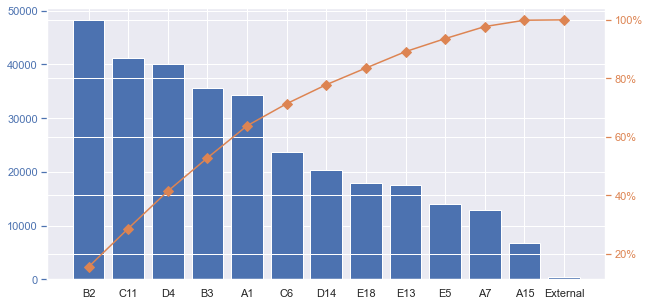

In [11]:
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(freq_tab_district.index, freq_tab_district["count"], color="C0")
ax2 = ax.twinx()
ax2.plot(freq_tab_district.index, freq_tab_district["Cumulative Frequency"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")

plt.show()

Based on the results from the frequency distribution, we can see that 80% of the incidents reported occurred in roughly 8 of the 12 districts, not including external reports.
Of the districts listed, four districts B2, C11, D4, and B3, account for 50% of total incidents reported over five years. Let us dive into these districts and see what kinds of crimes are being reported.         

----

In [12]:
data['DISTRICT'].unique()

array(['C11', 'B3', 'C6', 'D4', nan, 'A7', 'B2', 'D14', 'A1', 'E18', 'E5',
       'E13', 'A15', 'External'], dtype=object)

In [13]:
high_crime_locations = data.loc[(data['DISTRICT'] == 'B2') | (data['DISTRICT'] == 'C11') | (data['DISTRICT'] == 'D4') | (data['DISTRICT'] == 'B3') ] 

In [14]:
high_crime_locations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165080 entries, 0 to 314596
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   index                165080 non-null  int64         
 1   INCIDENT_NUMBER      165080 non-null  object        
 2   OFFENSE_CODE         165080 non-null  int64         
 3   OFFENSE_CODE_GROUP   106698 non-null  object        
 4   OFFENSE_DESCRIPTION  165080 non-null  object        
 5   DISTRICT             165080 non-null  object        
 6   REPORTING_AREA       165080 non-null  object        
 7   SHOOTING             59053 non-null   object        
 8   OCCURRED_ON_DATE     165080 non-null  datetime64[ns]
 9   YEAR                 165080 non-null  int64         
 10  MONTH                165080 non-null  int64         
 11  DAY_OF_WEEK          165080 non-null  object        
 12  HOUR                 165080 non-null  int64         
 13  UCR_PART      

In [15]:
high_crime_locations.shape

(165080, 18)

In [16]:
high_crime_locations.describe(include='all')

<ipython-input-16-e0d18ea65d7b>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  high_crime_locations.describe(include='all')


,index,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,165080.000000,165080,165080.00000,106698,165080,165080,165080,59053.0,165080,165080.000000,165080.000000,165080,165080.000000,106665,163371,158236.000000,1.582360e+05,165080
unique,NaN,150900,NaN,63,236,4,515,3.0,134612,NaN,NaN,7,NaN,4,5513,NaN,NaN,13646
top,NaN,I172053750,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0.0,2017-12-20 02:15:00,NaN,NaN,Friday,NaN,Part Three,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
freq,NaN,18,NaN,12211,10638,48189,13623,57095.0,18,NaN,NaN,24764,NaN,54418,7130,NaN,NaN,6844
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17 03:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,155872.752974,NaN,2348.83597,NaN,NaN,NaN,NaN,NaN,NaN,2018.392198,6.543088,NaN,13.090011,NaN,NaN,41.946659,-7.046107e+01,NaN
std,90416.123068,NaN,1187.59191,NaN,NaN,NaN,NaN,NaN,NaN,1.330522,3.490421,NaN,6.347886,NaN,NaN,3.926327,6.594157e+00,NaN
min,0.000000,NaN,111.00000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-7.117374e+01,NaN
25%,78021.750000,NaN,1102.00000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,3.000000,NaN,9.000000,NaN,NaN,42.295072,-7.108688e+01,NaN


In [17]:
# Double check the frequency to check the new results 
frequnecy_table(high_crime_locations['DISTRICT'])

col_0,count,Relative Frequency,Cumulative Frequency
DISTRICT,,,
B2,48189,29.191301,29.191301
C11,41135,24.918221,54.109523
D4,40102,24.292464,78.401987
B3,35654,21.598013,100.000000


In [18]:
# Store table results into new object for futher exploration
offense_tab = pd.crosstab(high_crime_locations['OFFENSE_DESCRIPTION'], high_crime_locations['DISTRICT'])
offense_tab

DISTRICT,B2,B3,C11,D4
OFFENSE_DESCRIPTION,,,,
A&B ON POLICE OFFICER,2,0,0,0
ABDUCTION - INTICING,0,1,0,0
AFFRAY,15,17,13,36
AIRCRAFT INCIDENTS,5,0,0,2
ANIMAL ABUSE,7,6,4,11
...,...,...,...,...
WEAPON - FIREARM - OTHER VIOLATION,35,18,20,10
WEAPON - FIREARM - SALE / TRAFFICKING,0,5,0,1
"WEAPON - OTHER - CARRYING / POSSESSING, ETC",59,33,39,41


In [19]:
# create a top 15 formula 
def sort_vals_bar_chart(i): # create function name 
    sort = pd.DataFrame() # create empty Dataframe 
    sorts = i.sort_values(ascending=False).head(15) #store value into object
    print(sorts)
    # Create labels for each bar 
    x_labels = sorts.values
    
    #plot the figure
    plt.figure(figsize = (12,8))
    ax = sorts.plot(kind="bar")
    ax.set_title('Top 15 offenses reported')
    ax.set_xlabel('Offenses Reported')
    ax.set_ylabel('Number of Incidents Recorded')
    
    rects = ax.patches

    # Make some labels.
    labels = x_labels

    for rect, label in zip(rects, labels):
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
                ha='center', va='bottom')


OFFENSE_DESCRIPTION
INVESTIGATE PERSON                       2891
M/V - LEAVING SCENE - PROPERTY DAMAGE    2881
SICK/INJURED/MEDICAL - PERSON            2373
VERBAL DISPUTE                           2368
VANDALISM                                2225
INVESTIGATE PROPERTY                     1790
ASSAULT SIMPLE - BATTERY                 1578
THREATS TO DO BODILY HARM                1533
LARCENY THEFT FROM MV - NON-ACCESSORY    1224
TOWED MOTOR VEHICLE                      1194
M/V ACCIDENT - PERSONAL INJURY            955
WARRANT ARREST                            954
ASSAULT - AGGRAVATED                      944
SICK ASSIST                               899
LARCENY THEFT FROM BUILDING               888
Name: B2, dtype: int64


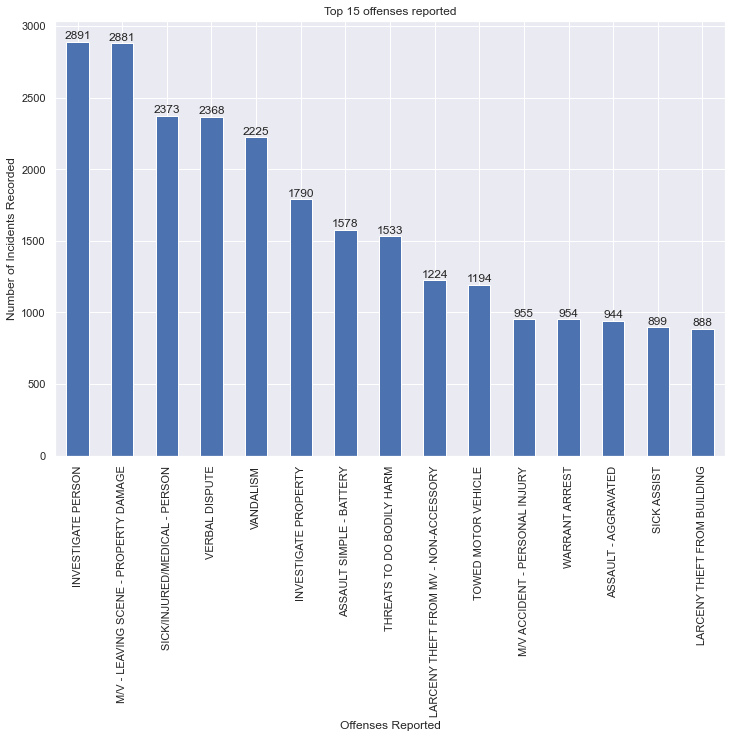

In [20]:
sort_vals_bar_chart(offense_tab['B2'])

OFFENSE_DESCRIPTION
INVESTIGATE PERSON                       2727
VERBAL DISPUTE                           2345
M/V - LEAVING SCENE - PROPERTY DAMAGE    1886
INVESTIGATE PROPERTY                     1861
VANDALISM                                1805
SICK/INJURED/MEDICAL - PERSON            1603
THREATS TO DO BODILY HARM                1251
ASSAULT SIMPLE - BATTERY                 1080
MISSING PERSON - LOCATED                 1018
TOWED MOTOR VEHICLE                      1005
SICK ASSIST                               772
LARCENY THEFT FROM MV - NON-ACCESSORY     725
ASSAULT - AGGRAVATED                      634
PROPERTY - LOST                           633
M/V ACCIDENT - PERSONAL INJURY            602
Name: B3, dtype: int64


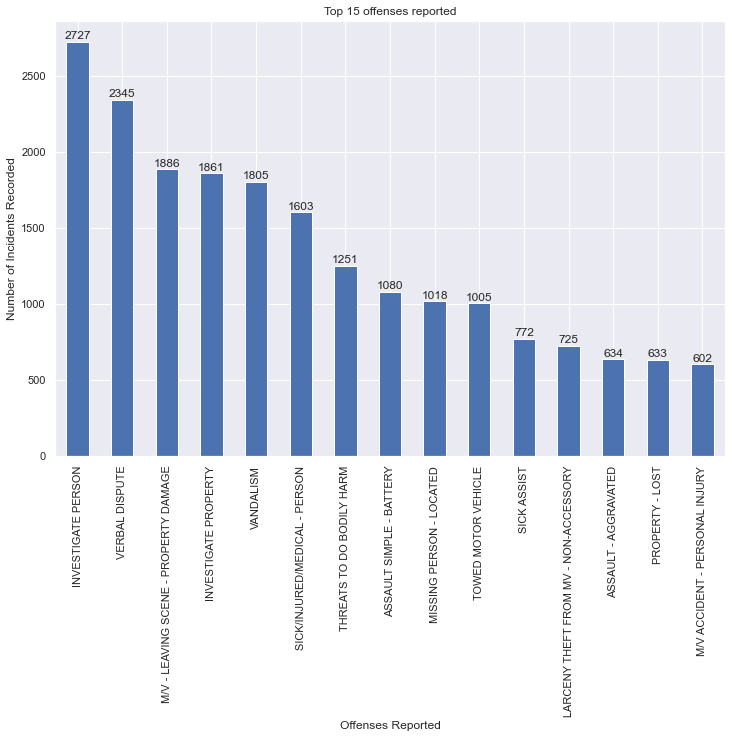

In [21]:
#view crimes 
sort_vals_bar_chart(offense_tab['B3'])

OFFENSE_DESCRIPTION
M/V - LEAVING SCENE - PROPERTY DAMAGE    2806
INVESTIGATE PERSON                       2720
SICK/INJURED/MEDICAL - PERSON            2274
VANDALISM                                2181
VERBAL DISPUTE                           2100
INVESTIGATE PROPERTY                     1762
TOWED MOTOR VEHICLE                      1394
THREATS TO DO BODILY HARM                1340
ASSAULT SIMPLE - BATTERY                 1277
LARCENY THEFT FROM MV - NON-ACCESSORY    1130
LARCENY SHOPLIFTING                       821
SICK ASSIST                               821
MISSING PERSON - LOCATED                  766
LARCENY THEFT FROM BUILDING               742
WARRANT ARREST                            726
Name: C11, dtype: int64


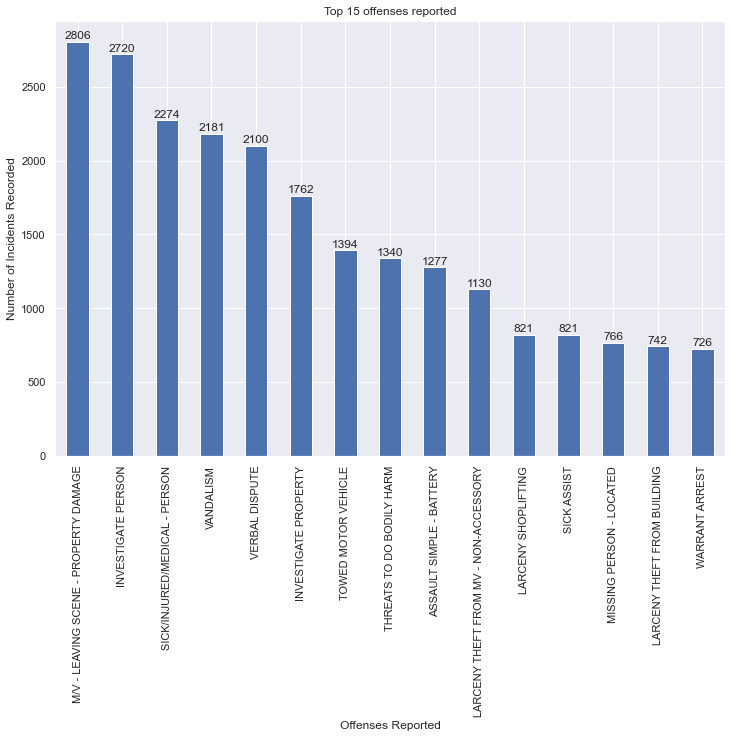

In [22]:
#view crimes 
sort_vals_bar_chart(offense_tab['C11'])

OFFENSE_DESCRIPTION
LARCENY SHOPLIFTING                      3025
INVESTIGATE PERSON                       2300
LARCENY THEFT FROM BUILDING              1977
TOWED MOTOR VEHICLE                      1742
SICK/INJURED/MEDICAL - PERSON            1710
LARCENY THEFT FROM MV - NON-ACCESSORY    1609
VANDALISM                                1565
INVESTIGATE PROPERTY                     1337
M/V - LEAVING SCENE - PROPERTY DAMAGE    1285
ASSAULT SIMPLE - BATTERY                 1246
LARCENY THEFT OF BICYCLE                  912
LARCENY ALL OTHERS                        881
PROPERTY - LOST                           878
WARRANT ARREST                            826
THREATS TO DO BODILY HARM                 800
Name: D4, dtype: int64


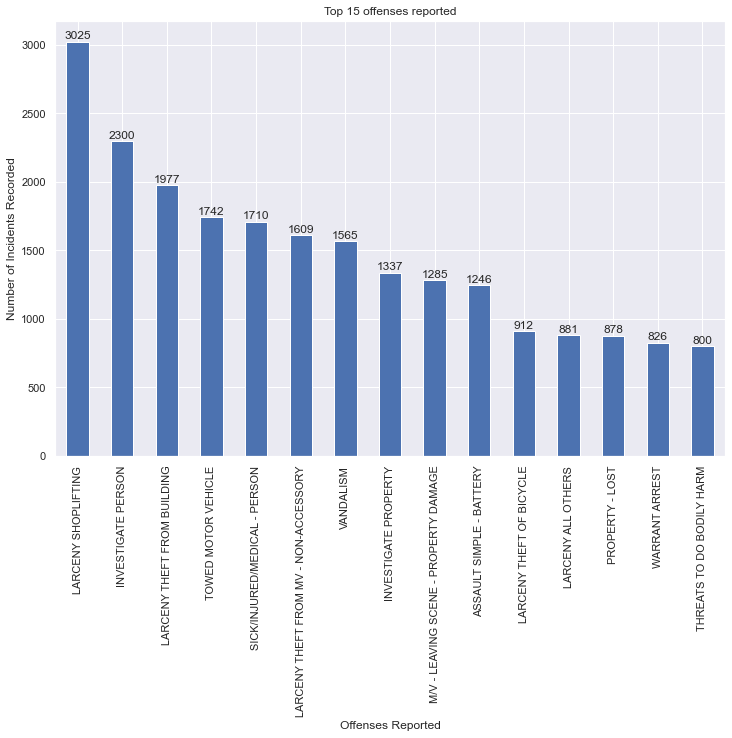

In [23]:
#view crimes 
sort_vals_bar_chart(offense_tab['D4'])

----

Results vary from district to district; however, there are some re-occurring themes throughout all four districts. What is it about these areas that may attract these crimes, and have these same crimes persisted from 2017- Now.

In [24]:
district_yr_offense_tab = pd.crosstab(columns=high_crime_locations['OFFENSE_DESCRIPTION'], index=[high_crime_locations['DISTRICT'], high_crime_locations['YEAR']])

In [25]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
temp = district_yr_offense_tab.loc['B2']
temp[['INVESTIGATE PERSON', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'SICK/INJURED/MEDICAL - PERSON', 'VERBAL DISPUTE', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'ASSAULT SIMPLE - BATTERY',
       'THREATS TO DO BODILY HARM', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'TOWED MOTOR VEHICLE', 'M/V ACCIDENT - PERSONAL INJURY',
       'WARRANT ARREST', 'ASSAULT - AGGRAVATED', 'SICK ASSIST',
       'LARCENY THEFT FROM BUILDING']]

OFFENSE_DESCRIPTION,INVESTIGATE PERSON,M/V - LEAVING SCENE - PROPERTY DAMAGE,SICK/INJURED/MEDICAL - PERSON,VERBAL DISPUTE,VANDALISM,INVESTIGATE PROPERTY,ASSAULT SIMPLE - BATTERY,THREATS TO DO BODILY HARM,LARCENY THEFT FROM MV - NON-ACCESSORY,TOWED MOTOR VEHICLE,M/V ACCIDENT - PERSONAL INJURY,WARRANT ARREST,ASSAULT - AGGRAVATED,SICK ASSIST,LARCENY THEFT FROM BUILDING
YEAR,,,,,,,,,,,,,,,
2017,1036,906,935,1033,755,558,768,522,347,343,318,507,188,0,334
2018,767,828,981,970,658,461,810,547,340,353,292,447,209,0,295
2019,147,197,98,39,127,110,0,96,42,87,70,0,80,129,59
2020,675,688,282,223,525,509,0,277,400,290,195,0,373,556,152
2021,266,262,77,103,160,152,0,91,95,121,80,0,94,214,48


Although crime has decreased slightly since 2017 - most crimes have remained relatively high. Additionally, as time elapses, norms and standards will evolve to adapt to a changing environment. Why has the B2 District remained the same over several years? Is there are large enough police force/presence to handle these crimes? How has local enforcement adjusted to counteract criminal activities and enterprises within these communities? These and a ton of other questions!  

District B2 

In [26]:
temp = district_yr_offense_tab.loc['B3']
temp[['INVESTIGATE PERSON', 'VERBAL DISPUTE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PROPERTY',
       'VANDALISM', 'SICK/INJURED/MEDICAL - PERSON',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'MISSING PERSON - LOCATED', 'TOWED MOTOR VEHICLE', 'SICK ASSIST',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'ASSAULT - AGGRAVATED',
       'PROPERTY - LOST', 'M/V ACCIDENT - PERSONAL INJURY']]

OFFENSE_DESCRIPTION,INVESTIGATE PERSON,VERBAL DISPUTE,M/V - LEAVING SCENE - PROPERTY DAMAGE,INVESTIGATE PROPERTY,VANDALISM,SICK/INJURED/MEDICAL - PERSON,THREATS TO DO BODILY HARM,ASSAULT SIMPLE - BATTERY,MISSING PERSON - LOCATED,TOWED MOTOR VEHICLE,SICK ASSIST,LARCENY THEFT FROM MV - NON-ACCESSORY,ASSAULT - AGGRAVATED,PROPERTY - LOST,M/V ACCIDENT - PERSONAL INJURY
YEAR,,,,,,,,,,,,,,,
2017,861,1007,561,533,626,612,429,528,342,259,0,186,157,307,209
2018,765,941,540,568,518,694,476,552,306,283,0,200,145,326,174
2019,158,47,153,106,99,60,67,0,94,65,113,79,55,0,33
2020,628,270,461,485,435,179,228,0,225,285,450,227,230,0,143
2021,315,80,171,169,127,58,51,0,51,113,209,33,47,0,43


In [27]:
temp = district_yr_offense_tab.loc['C11']
temp[['M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PERSON',
       'SICK/INJURED/MEDICAL - PERSON', 'VANDALISM', 'VERBAL DISPUTE',
       'INVESTIGATE PROPERTY', 'TOWED MOTOR VEHICLE',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'LARCENY SHOPLIFTING',
       'SICK ASSIST', 'MISSING PERSON - LOCATED',
       'LARCENY THEFT FROM BUILDING', 'WARRANT ARREST']]

OFFENSE_DESCRIPTION,M/V - LEAVING SCENE - PROPERTY DAMAGE,INVESTIGATE PERSON,SICK/INJURED/MEDICAL - PERSON,VANDALISM,VERBAL DISPUTE,INVESTIGATE PROPERTY,TOWED MOTOR VEHICLE,THREATS TO DO BODILY HARM,ASSAULT SIMPLE - BATTERY,LARCENY THEFT FROM MV - NON-ACCESSORY,LARCENY SHOPLIFTING,SICK ASSIST,MISSING PERSON - LOCATED,LARCENY THEFT FROM BUILDING,WARRANT ARREST
YEAR,,,,,,,,,,,,,,,
2017,856,961,850,739,894,513,455,387,623,267,214,0,241,218,475
2018,836,713,941,717,850,478,381,500,654,335,229,0,361,215,251
2019,181,182,83,115,51,134,89,75,0,77,69,119,20,55,0
2020,646,648,308,452,232,467,330,296,0,361,236,529,107,197,0
2021,287,216,92,158,73,170,139,82,0,90,73,173,37,57,0


In [28]:
temp = district_yr_offense_tab.loc['D4']
temp[['LARCENY SHOPLIFTING', 'INVESTIGATE PERSON',
       'LARCENY THEFT FROM BUILDING', 'TOWED MOTOR VEHICLE',
       'SICK/INJURED/MEDICAL - PERSON',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY', 'LARCENY THEFT OF BICYCLE',
       'LARCENY ALL OTHERS', 'PROPERTY - LOST', 'WARRANT ARREST',
       'THREATS TO DO BODILY HARM']]

OFFENSE_DESCRIPTION,LARCENY SHOPLIFTING,INVESTIGATE PERSON,LARCENY THEFT FROM BUILDING,TOWED MOTOR VEHICLE,SICK/INJURED/MEDICAL - PERSON,LARCENY THEFT FROM MV - NON-ACCESSORY,VANDALISM,INVESTIGATE PROPERTY,M/V - LEAVING SCENE - PROPERTY DAMAGE,ASSAULT SIMPLE - BATTERY,LARCENY THEFT OF BICYCLE,LARCENY ALL OTHERS,PROPERTY - LOST,WARRANT ARREST,THREATS TO DO BODILY HARM
YEAR,,,,,,,,,,,,,,,
2017,866,738,642,655,611,539,540,417,402,606,191,309,403,490,237
2018,929,582,756,568,655,421,458,403,426,640,266,243,475,336,286
2019,191,129,189,108,67,79,72,73,95,0,40,81,0,0,47
2020,693,588,309,313,280,478,380,313,243,0,362,206,0,0,189
2021,346,263,81,98,97,92,115,131,119,0,53,42,0,0,41


Overall, these areas continue to present a problem for local law enforcement. I am interested to learn how local and city governments will help deter crime, which has been rather persistent in these areas for several years. Maybe the answer is Gentrification!? Nonetheless, it would be interesting to see the distribution of these crimes over five years

In [29]:
district_yrmnth_offense_tab = pd.crosstab(columns=high_crime_locations['OFFENSE_DESCRIPTION'], index=[high_crime_locations['DISTRICT'], high_crime_locations['YEAR'], high_crime_locations['MONTH']])

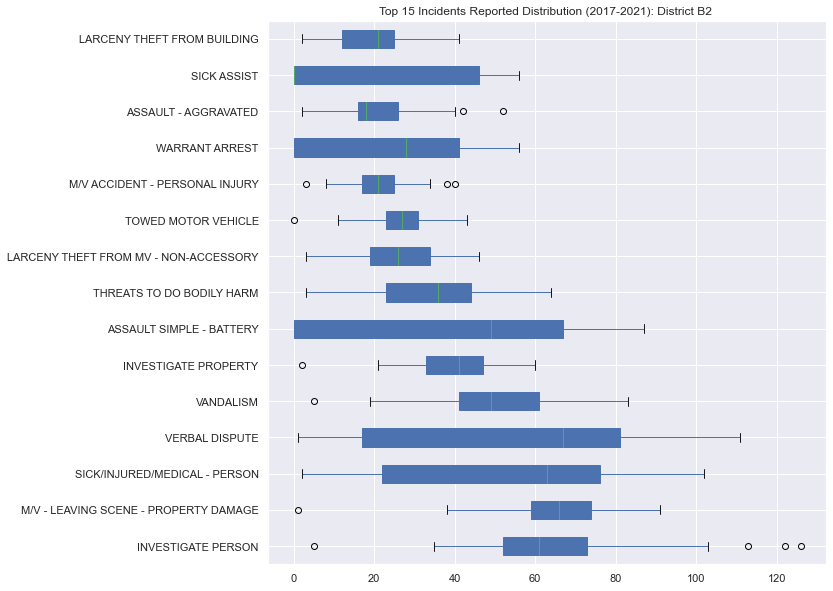

In [30]:
temp = district_yrmnth_offense_tab.loc['B2']
temp[['INVESTIGATE PERSON', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'SICK/INJURED/MEDICAL - PERSON', 'VERBAL DISPUTE', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'ASSAULT SIMPLE - BATTERY',
       'THREATS TO DO BODILY HARM', 'LARCENY THEFT FROM MV - NON-ACCESSORY',
       'TOWED MOTOR VEHICLE', 'M/V ACCIDENT - PERSONAL INJURY',
       'WARRANT ARREST', 'ASSAULT - AGGRAVATED', 'SICK ASSIST',
       'LARCENY THEFT FROM BUILDING']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District B2 ", patch_artist=True);

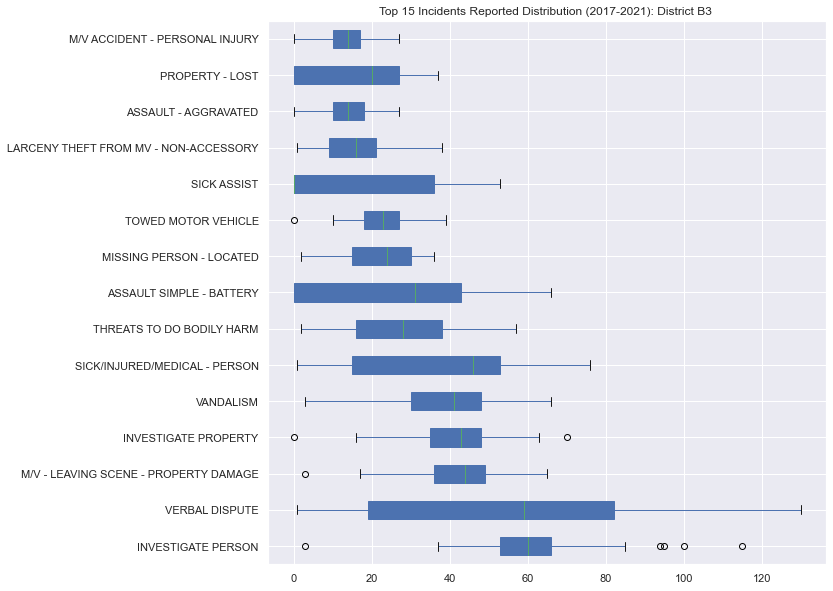

In [31]:
temp = district_yrmnth_offense_tab.loc['B3']
temp[['INVESTIGATE PERSON', 'VERBAL DISPUTE',
       'M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PROPERTY',
       'VANDALISM', 'SICK/INJURED/MEDICAL - PERSON',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'MISSING PERSON - LOCATED', 'TOWED MOTOR VEHICLE', 'SICK ASSIST',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'ASSAULT - AGGRAVATED',
       'PROPERTY - LOST', 'M/V ACCIDENT - PERSONAL INJURY']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District B3 ", patch_artist=True);

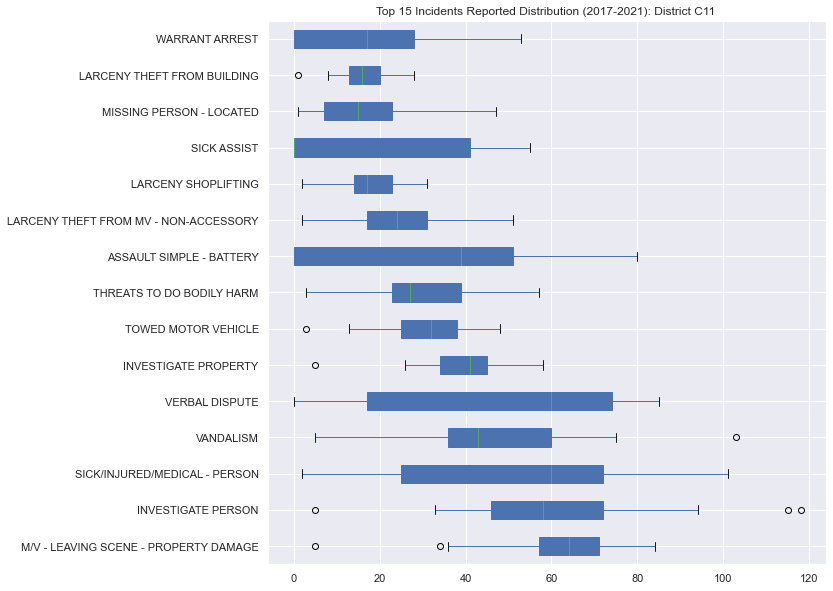

In [32]:
temp = district_yrmnth_offense_tab.loc['C11']
temp[['M/V - LEAVING SCENE - PROPERTY DAMAGE', 'INVESTIGATE PERSON',
       'SICK/INJURED/MEDICAL - PERSON', 'VANDALISM', 'VERBAL DISPUTE',
       'INVESTIGATE PROPERTY', 'TOWED MOTOR VEHICLE',
       'THREATS TO DO BODILY HARM', 'ASSAULT SIMPLE - BATTERY',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'LARCENY SHOPLIFTING',
       'SICK ASSIST', 'MISSING PERSON - LOCATED',
       'LARCENY THEFT FROM BUILDING', 'WARRANT ARREST']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District C11 ", patch_artist=True);

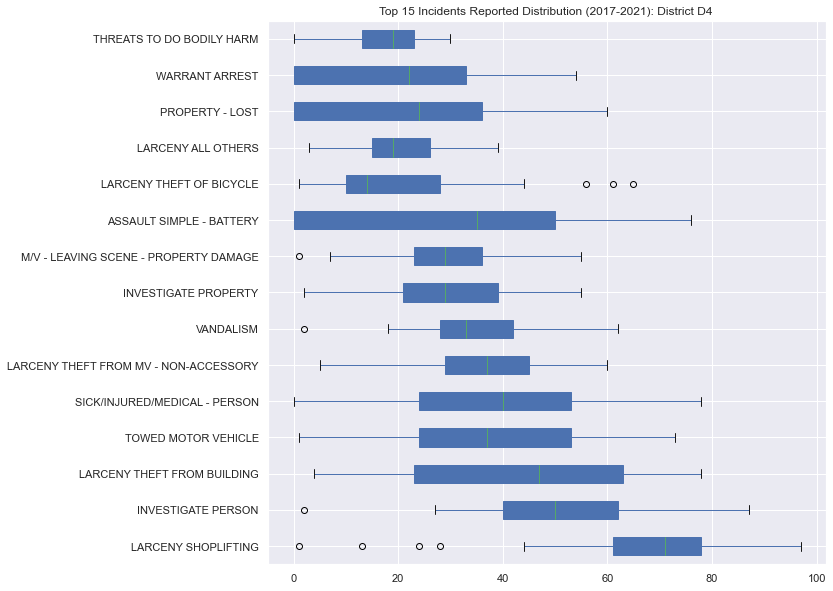

In [33]:
temp = district_yrmnth_offense_tab.loc['D4']
temp[['LARCENY SHOPLIFTING', 'INVESTIGATE PERSON',
       'LARCENY THEFT FROM BUILDING', 'TOWED MOTOR VEHICLE',
       'SICK/INJURED/MEDICAL - PERSON',
       'LARCENY THEFT FROM MV - NON-ACCESSORY', 'VANDALISM',
       'INVESTIGATE PROPERTY', 'M/V - LEAVING SCENE - PROPERTY DAMAGE',
       'ASSAULT SIMPLE - BATTERY', 'LARCENY THEFT OF BICYCLE',
       'LARCENY ALL OTHERS', 'PROPERTY - LOST', 'WARRANT ARREST',
       'THREATS TO DO BODILY HARM']].plot.box(vert=False, figsize=(10,10), title = "Top 15 Incidents Reported Distribution (2017-2021): District D4 ", patch_artist=True, );

The results are rather surprising in my opinion. Over the course of 4-5 years, the same crimes have presisted within these four districts, and remained relativity high YoY and MoM, which is astonishing. To gain a better understanding, learning more about the location, and times these crimes are reported can help local law enforcement develop plans to subvert criminal activities. 

In [34]:
# lets model time 
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

district_dow_offense_tab = pd.crosstab(columns=high_crime_locations['DISTRICT'], index=[high_crime_locations['YEAR'], high_crime_locations['DAY_OF_WEEK']])
district_dow_offense_tab

DISTRICT            B2    B3   C11    D4
YEAR DAY_OF_WEEK                        
2017 Friday       2404  1688  2002  1972
     Monday       2251  1709  1969  1771
     Saturday     2106  1642  1956  1727
     Sunday       2013  1493  1847  1608
     Thursday     2462  1601  1925  1865
     Tuesday      2302  1736  2044  1831
     Wednesday    2439  1726  1990  1990
2018 Friday       2366  1745  1934  1826
     Monday       2231  1711  1956  1738
     Saturday     2142  1611  1766  1817
     Sunday       1891  1453  1620  1686
     Thursday     2289  1657  1901  1858
     Tuesday      2288  1714  1857  1787
     Wednesday    2451  1669  1923  1742
2019 Friday        413   307   357   389
     Monday        461   337   401   378
     Saturday      352   262   310   330
     Sunday        358   303   310   318
     Thursday      407   288   318   360
     Tuesday       421   308   364   412
     Wednesday     422   284   336   388
2020 Friday       1580  1192  1332  1401
     Monday       1556  1059  1268  1403
     Saturday     1356  1154  1264  1247
     Sunday       1305  1048  1130  1154
     Thursday     1539  1142  1311  1319
     Tuesday      1562  1102  1324  1366
     Wednesday    1544  1131  1363  1393
2021 Friday        508   364   505   479
     Monday        483   374   424   404
     Saturday      448   414   411   438
     Sunday        418   353   401   388
     Thursday      474   370   430   437
     Tuesday       464   358   440   482
     Wednesday     483   349   446   398

<AxesSubplot:xlabel='DAY_OF_WEEK'>

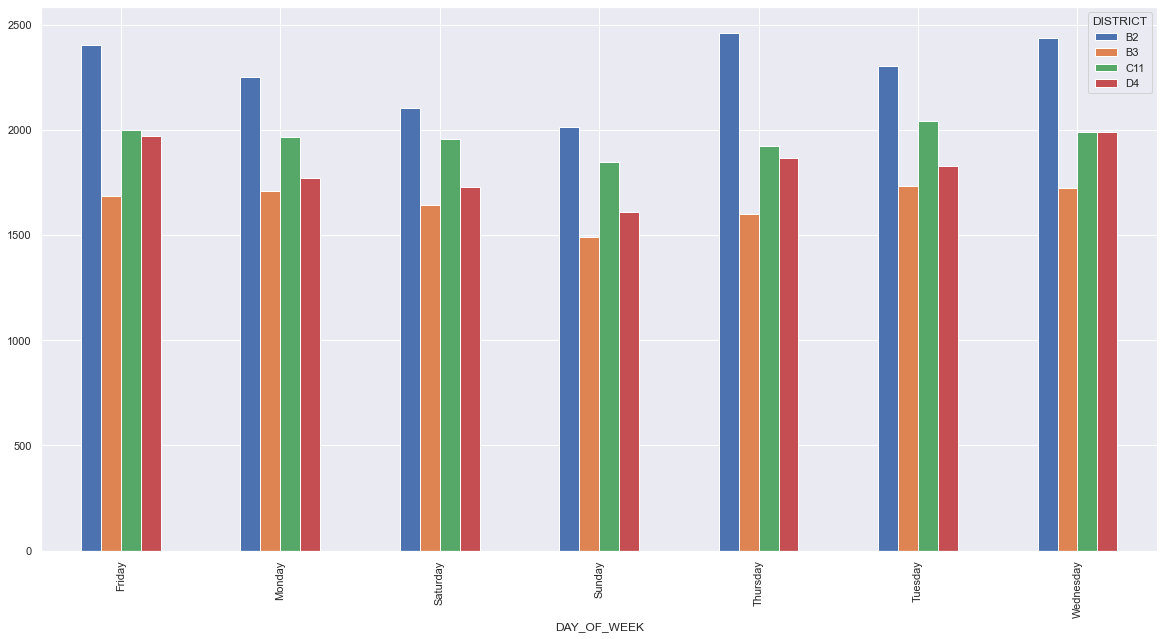

In [35]:
district_dow_offense_tab.loc[2017].plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='DAY_OF_WEEK'>

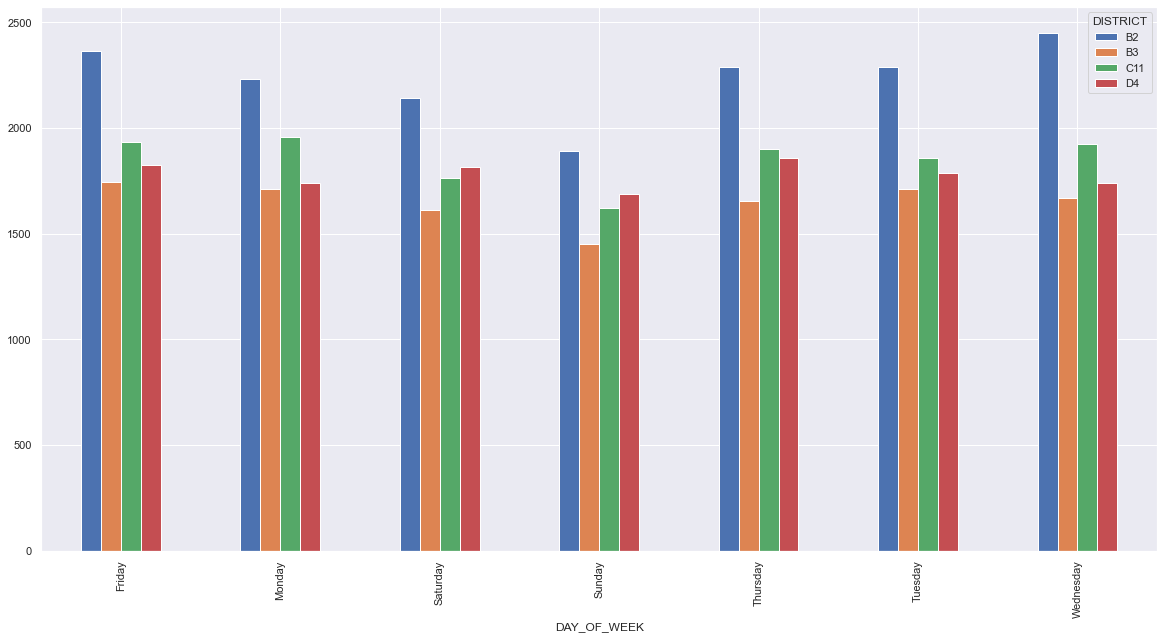

In [36]:
district_dow_offense_tab.loc[2018].plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='DAY_OF_WEEK'>

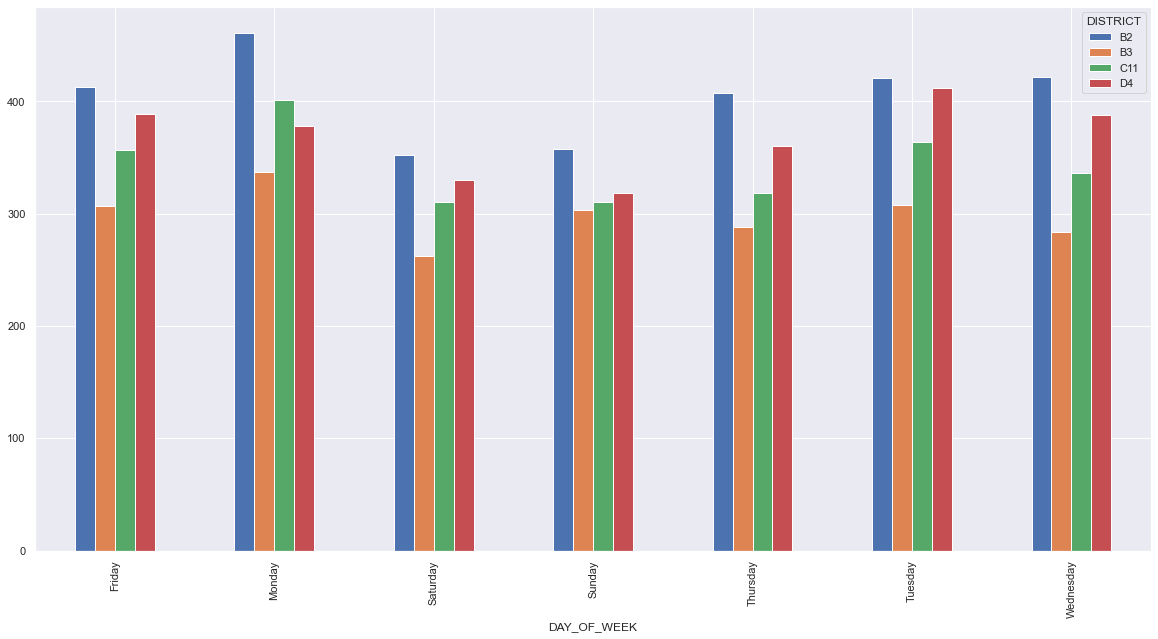

In [37]:
district_dow_offense_tab.loc[2019].plot(kind='bar', figsize=(20,10))

<AxesSubplot:xlabel='DAY_OF_WEEK'>

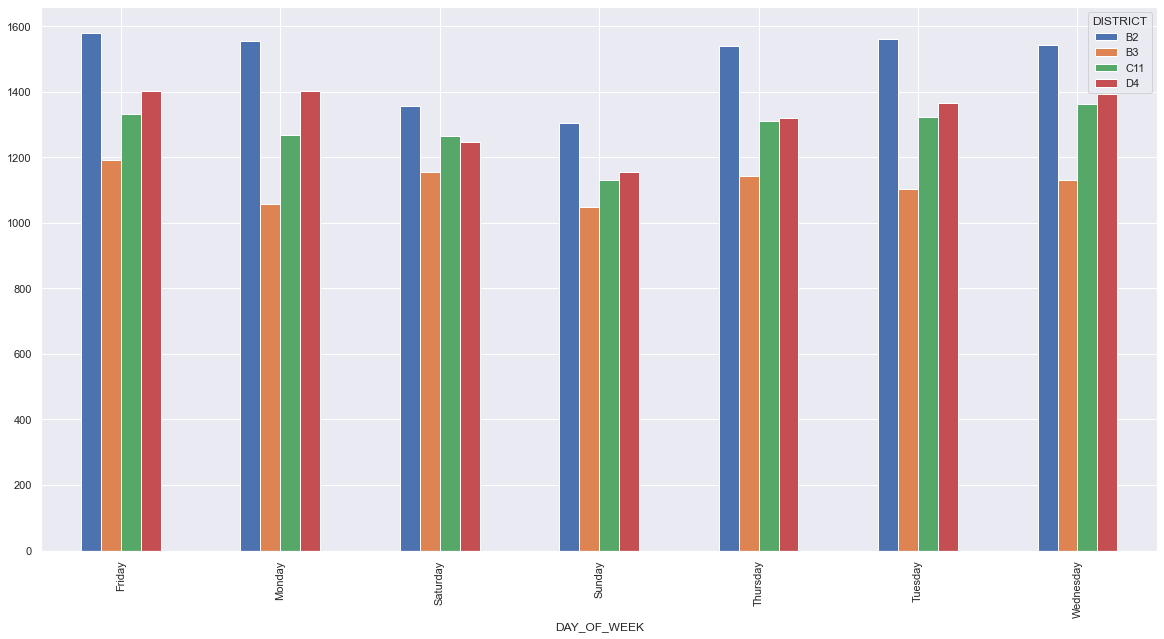

In [38]:
district_dow_offense_tab.loc[2020].plot(kind='bar', figsize=(20,10))

The results indicate soemthing interesting; most crimes occur on Wednesdays? That is very odd to be honest. What is it about Wednesday that criminals love? Nonetheless, Friday, Thursday, and Tuesday rank as the worst days of the week for at least B2 and C11. 

In [39]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
district_dowyr_offense_tab = pd.crosstab(columns=[high_crime_locations['DISTRICT']], index=[high_crime_locations['YEAR'].astype('str')])
district_dowyr_offense_tab

DISTRICT,B2,B3,C11,D4
YEAR,,,,
2017,15977,11595,13733,12764
2018,15658,11560,12957,12454
2019,2834,2089,2396,2575
2020,10442,7828,8992,9283
2021,3278,2582,3057,3026


<AxesSubplot:ylabel='YEAR'>

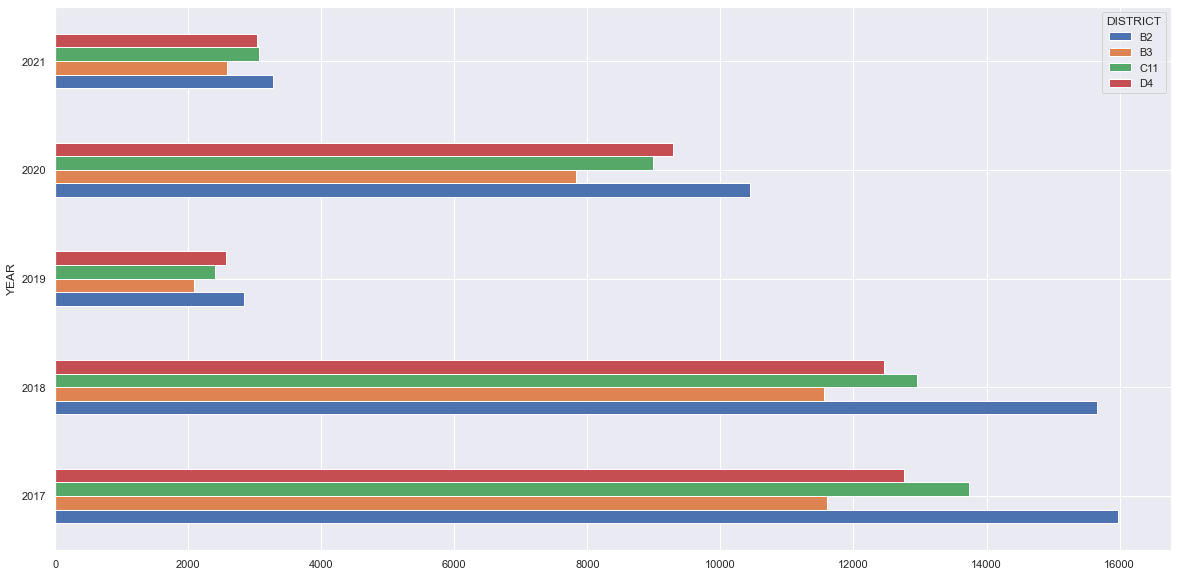

In [40]:
district_dowyr_offense_tab.plot(kind='barh', figsize=(20,10))

In [41]:
district_month_offense_tab = pd.crosstab(columns=high_crime_locations['DISTRICT'], index=[high_crime_locations['MONTH']])
district_month_offense_tab

DISTRICT,B2,B3,C11,D4
MONTH,,,,
1,4106,3079,3646,3343
2,3779,2794,3330,3209
3,4260,3106,3503,3420
4,3977,2890,3407,3374
5,4024,3065,3572,3286
6,3711,2829,3174,3104
7,3806,2769,3172,3191
8,3738,2894,3162,3099
9,3860,2711,3194,3257


<AxesSubplot:title={'center':'Crimes Reported by Month (2017-2021)'}, xlabel='MONTH', ylabel='Number of Crimes Reported'>

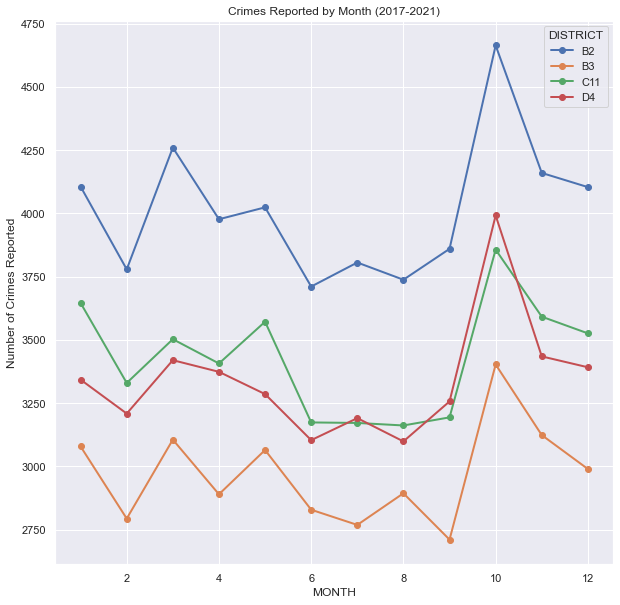

In [42]:
district_month_offense_tab.plot(figsize=(10,10), ylabel="Number of Crimes Reported",title="Crimes Reported by Month (2017-2021)", linewidth=2, marker='o')

The month of October seems to be a trend. That begs to question, what is so special about this particular month; I am unaware of any holidays other than Halloween. For future consideration, it would be awesome to see what crimes are committed in October than any other month

## Data Cleaning

In [43]:
model_data  = high_crime_locations.copy()
model_data = model_data.reset_index()

In [44]:
model_data.describe(include='all')

<ipython-input-44-3d38501b29f9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  model_data.describe(include='all')


,level_0,index,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
count,165080.000000,165080.000000,165080,165080.00000,106698,165080,165080,165080,59053.0,165080,165080.000000,165080.000000,165080,165080.000000,106665,163371,158236.000000,1.582360e+05,165080
unique,NaN,NaN,150900,NaN,63,236,4,515,3.0,134612,NaN,NaN,7,NaN,4,5513,NaN,NaN,13646
top,NaN,NaN,I172053750,NaN,Motor Vehicle Accident Response,INVESTIGATE PERSON,B2,,0.0,2017-12-20 02:15:00,NaN,NaN,Friday,NaN,Part Three,BLUE HILL AVE,NaN,NaN,"(0.00000000, 0.00000000)"
freq,NaN,NaN,18,NaN,12211,10638,48189,13623,57095.0,18,NaN,NaN,24764,NaN,54418,7130,NaN,NaN,6844
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17 03:39:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,155872.752974,155872.752974,NaN,2348.83597,NaN,NaN,NaN,NaN,NaN,NaN,2018.392198,6.543088,NaN,13.090011,NaN,NaN,41.946659,-7.046107e+01,NaN
std,90416.123068,90416.123068,NaN,1187.59191,NaN,NaN,NaN,NaN,NaN,NaN,1.330522,3.490421,NaN,6.347886,NaN,NaN,3.926327,6.594157e+00,NaN
min,0.000000,0.000000,NaN,111.00000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,1.000000,NaN,0.000000,NaN,NaN,-1.000000,-7.117374e+01,NaN
25%,78021.750000,78021.750000,NaN,1102.00000,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,3.000000,NaN,9.000000,NaN,NaN,42.295072,-7.108688e+01,NaN


In [45]:
# Drop irrelevant columns 
model_data = model_data.drop(['level_0','index','INCIDENT_NUMBER','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION','OCCURRED_ON_DATE','STREET','Location', 'REPORTING_AREA'], axis = 1)

In [46]:
#check missing values
model_data.isna().sum()

OFFENSE_CODE         0
DISTRICT             0
SHOOTING        106027
YEAR                 0
MONTH                0
DAY_OF_WEEK          0
HOUR                 0
UCR_PART         58415
Lat               6844
Long              6844
dtype: int64

In [47]:
# Map features
model_data['DISTRICT'] = model_data['DISTRICT'].map({'C11':1, 'B3':2, 'D4':3, 'B2':4})
model_data['UCR_PART'] = model_data['UCR_PART'].map({'Part One': 1 , 'Part Two': 2, 'Part Three': 3, 'Other': 4})
model_data['DAY_OF_WEEK'] = model_data['DAY_OF_WEEK'].map({'Wednesday': 4, 'Tuesday': 3, 'Friday':6, 'Thursday':5, 'Sunday':1, 'Saturday':7, 'Monday':2})
model_data['SHOOTING'] = model_data['SHOOTING'].map({'Y':1})
model_data['SHOOTING'] = model_data['SHOOTING'].fillna(value=0) 
model_data['UCR_PART'] = model_data['UCR_PART'].fillna(value=0)
model_data['Lat'] = model_data['Lat'].fillna(value=0)
model_data['Long'] = model_data['Long'].fillna(value=0)

In [48]:
# double check missing values
model_data.isna().sum()

OFFENSE_CODE    0
DISTRICT        0
SHOOTING        0
YEAR            0
MONTH           0
DAY_OF_WEEK     0
HOUR            0
UCR_PART        0
Lat             0
Long            0
dtype: int64

In [49]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165080 entries, 0 to 165079
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   OFFENSE_CODE  165080 non-null  int64  
 1   DISTRICT      165080 non-null  int64  
 2   SHOOTING      165080 non-null  float64
 3   YEAR          165080 non-null  int64  
 4   MONTH         165080 non-null  int64  
 5   DAY_OF_WEEK   165080 non-null  int64  
 6   HOUR          165080 non-null  int64  
 7   UCR_PART      165080 non-null  float64
 8   Lat           165080 non-null  float64
 9   Long          165080 non-null  float64
dtypes: float64(4), int64(6)
memory usage: 12.6 MB


In [50]:
model_data.shape

(165080, 10)

In [51]:
# model_data['Long'] = model_data['Long'].astype('int64')
# model_data['Lat'] = model_data['Lat'].astype('int64')
# model_data['UCR_PART'] = model_data['UCR_PART'].astype('int64')
# model_data['SHOOTING'] = model_data['SHOOTING'].astype('int64')

## Modeling

### Clustering (unscaled data)

In [52]:
#import sklearn.cluster module 
from sklearn.cluster import KMeans

# create a variable which will contain the data for clustering
x = model_data.copy()
# Create k-means object with 2 clusters
kmeans = KMeans(2)
# fit the data 
kmeans.fit(x)

KMeans(n_clusters=2)

In [53]:
clusters = kmeans.fit(x) # fit the data 
identified_clusters = kmeans.fit_predict(x) # store predicted clusters into object
df_clusters = model_data.copy() # create new data frame
df_clusters['Clusters'] = identified_clusters # create new column with predicted clusters
df_clusters

,OFFENSE_CODE,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Clusters
0,619,1,0.0,2017,8,4,0,1.0,42.300605,-71.059230,1
1,1107,2,0.0,2017,2,3,0,2.0,42.284315,-71.074108,1
2,802,3,0.0,2017,9,6,16,2.0,42.335119,-71.074917,1
3,1102,3,0.0,2017,9,6,0,2.0,42.345163,-71.071291,1
4,614,1,0.0,2017,11,5,0,1.0,42.304186,-71.065549,1
...,...,...,...,...,...,...,...,...,...,...,...
165075,613,3,0.0,2021,5,6,17,0.0,0.000000,0.000000,1
165076,3831,1,0.0,2021,3,7,9,0.0,42.307289,-71.058499,0
165077,2007,1,0.0,2021,2,2,22,0.0,42.297555,-71.059709,1
165078,1102,2,0.0,2021,1,3,12,0.0,42.333679,-71.091878,1


## Clustering (Scaled & PCA)

### Standardize the variables 

In [54]:
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [55]:
sd_data =  model_data.copy() # make a copy of the data set 
x = sd_data # store the feature variables object
scaled_x = preprocessing.scale(x) #Standardize the data to have a mean of ~0 and a variance of 1
scaled_x 

array([[-1.45659565, -1.36989735, -0.06388494, ..., -0.39934523,
         0.2274194 , -0.2276598 ],
       [-1.04567884, -0.50153734, -0.06388494, ...,  0.38272598,
         0.22564933, -0.22862223],
       [-1.30250185,  0.36682266, -0.06388494, ...,  0.38272598,
         0.23116957, -0.22867454],
       ...,
       [-0.28784046, -1.36989735, -0.06388494, ..., -1.18141644,
         0.22708801, -0.22769078],
       [-1.04988905, -0.50153734, -0.06388494, ..., -1.18141644,
         0.23101312, -0.22977167],
       [ 0.65356321,  0.36682266, -0.06388494, ..., -1.18141644,
         0.23104268, -0.22870509]])

### Apply Principal Component Analysis

In [56]:
#Assign model to object
pca = PCA()
#fit the model 
pca.fit(scaled_x)
# The results display the variance explained by each of the individual components
pca.explained_variance_ratio_

array([2.14537188e-01, 1.74037247e-01, 1.10200000e-01, 1.01532078e-01,
       9.95041447e-02, 9.90855334e-02, 9.86180237e-02, 9.02692274e-02,
       1.22162280e-02, 3.29239140e-07])

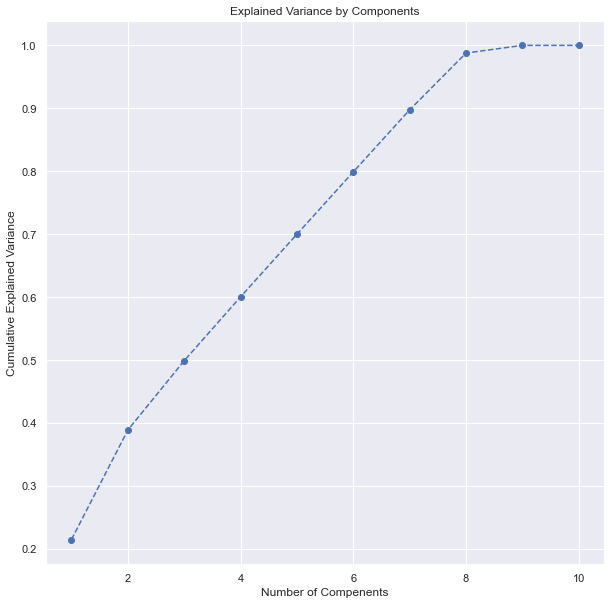

In [57]:
plt.figure(figsize = (10,10))
plt.plot(range(1,11), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = "--")
plt.title('Explained Variance by Components')
plt.xlabel('Number of Compenents')
plt.ylabel('Cumulative Explained Variance')
plt.show()

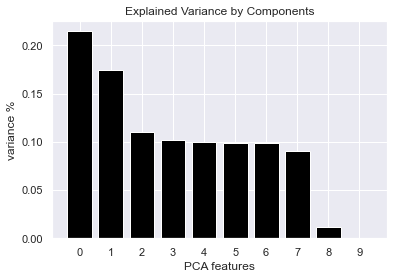

In [58]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.title('Explained Variance by Components')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
plt.show()

After scaling and applying PCA to the data, only two or three components explain a majority of variance within the data. However, if I only take two elements, we sacrifice more than 60% of the data. Moving forward, I will use two components for the remainder of the study.

In [59]:
# store compenents in a Dataframe
pca = PCA(2)
pca.fit(scaled_x)
pca_comps = pca.transform(scaled_x)

## Apply elbow method 

In [60]:
wcss = []
# 'cl_num' is a that keeps track the highest number of clusters we want to use the WCSS method for. We have it set at 10 right now, but it is completely arbitrary.
cl_num = 11
for i in range (1,cl_num):
    kmeans= KMeans(i)
    kmeans.fit(pca_comps)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)
    
wcss

[641458.678277098,
 308214.5730641811,
 68177.49118176967,
 36283.56263901455,
 27352.825391416813,
 19219.233061429648,
 13780.191390090598,
 9510.233900935724,
 7633.623876197602,
 5905.007912141818]

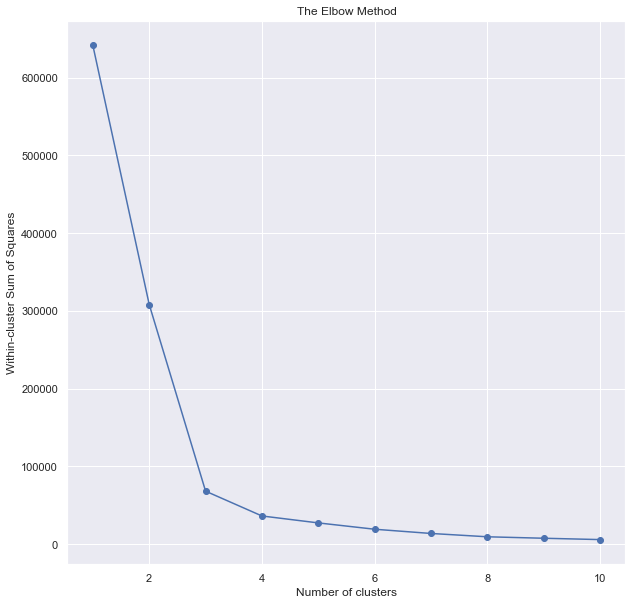

In [61]:
number_clusters = range(1,cl_num)
plt.figure(figsize=(10,10))
plt.plot(number_clusters, wcss, '-o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')
plt.show()

Based on the results from the elbow analysis, the point of interest is around 3 or 4 clusters. 

In [62]:
# define the model
kmeans = KMeans(3)
#fit the model
kmeans.fit(pca_comps)
# store clusters
final_clusters = sd_data.copy() 
final_clusters['Clusters'] = kmeans.fit_predict(pca_comps)
final_clusters

,OFFENSE_CODE,DISTRICT,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,Lat,Long,Clusters
0,619,1,0.0,2017,8,4,0,1.0,42.300605,-71.059230,1
1,1107,2,0.0,2017,2,3,0,2.0,42.284315,-71.074108,1
2,802,3,0.0,2017,9,6,16,2.0,42.335119,-71.074917,1
3,1102,3,0.0,2017,9,6,0,2.0,42.345163,-71.071291,1
4,614,1,0.0,2017,11,5,0,1.0,42.304186,-71.065549,1
...,...,...,...,...,...,...,...,...,...,...,...
165075,613,3,0.0,2021,5,6,17,0.0,0.000000,0.000000,2
165076,3831,1,0.0,2021,3,7,9,0.0,42.307289,-71.058499,0
165077,2007,1,0.0,2021,2,2,22,0.0,42.297555,-71.059709,0
165078,1102,2,0.0,2021,1,3,12,0.0,42.333679,-71.091878,0


----

Ultimately, my research unearthed some interesting findings that are worth exploring. I am very interested in how crime rates will change in the city with impending gentrification and the massive migration of city dwellers to impoverished suburban areas. All in all, nothing is ever perfect; however, the lack of accountability on the side of law enforcement and local government is astounding. We as citizens deserve to know and understand how the state plans to discourage and deter crime from these areas. Knowledge is power, and using the data effectively can create awareness and opportunities for growth in a failing system; this is one of many steps Boston Natives need to take to reclaim their neighborhoods.  